In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [3]:
df = pd.read_csv("data/2020.csv")
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


c:\Users\Estelle\miniconda3\envs\spyder-env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


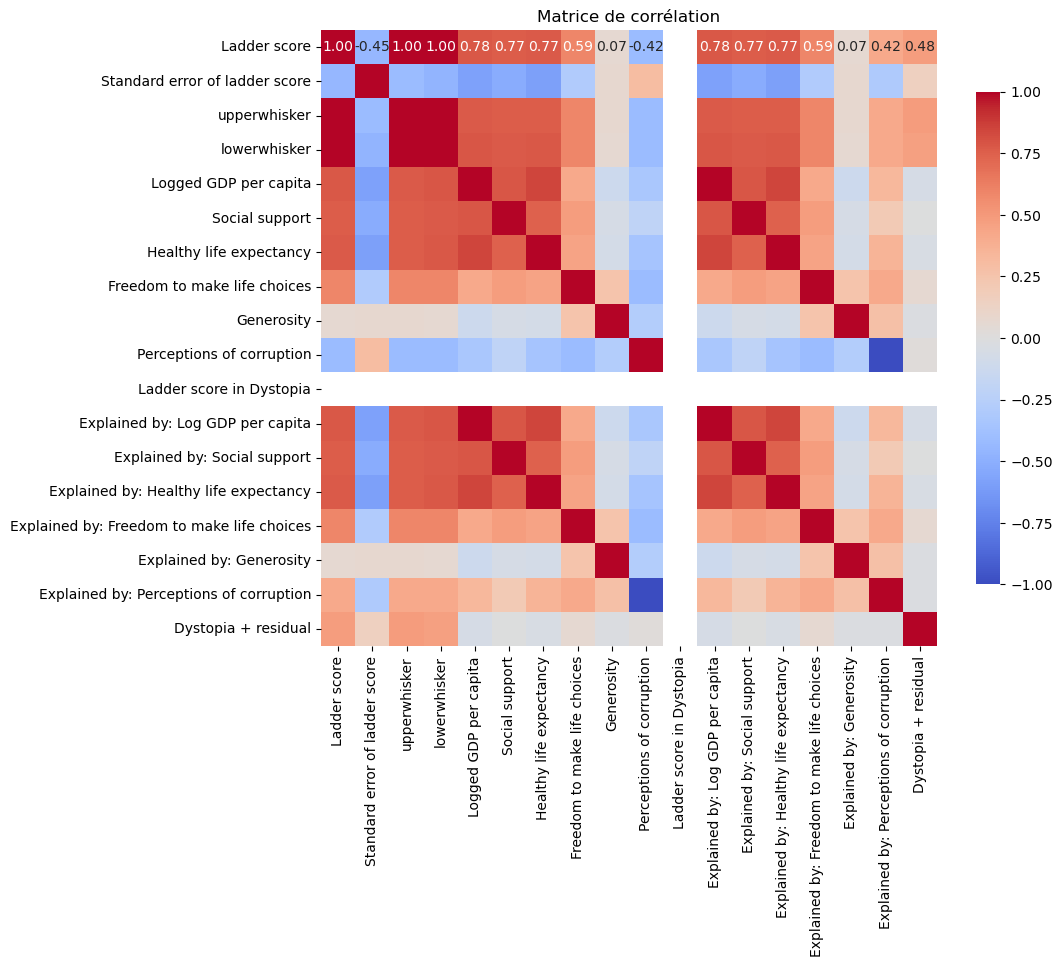

In [4]:

df_test = df.drop(columns=['Country name', 'Regional indicator'])

correlation = df_test.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation')
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data = df.iloc[:,3:11]
#data = df

#data = pd.pivot(data, index = 'Country name', colums)
#print(data)

# Réaliser l'ACP
pca = PCA(n_components=2)  # Choisissez le nombre de composantes souhaité
principal_components = pca.fit_transform(data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
#principal_df['Country name'] = df['Country name']
#principal_df['Regional indicator'] = df['Regional indicator']

print(principal_df)

# Créer un DataFrame avec les composantes principales



           PC1       PC2
0    -8.027606 -1.937133
1    -8.496145 -1.660388
2   -10.161266 -1.254324
3    -9.043776 -1.355242
4    -9.280709 -1.379758
..         ...       ...
148  19.631931 -0.554895
149   4.029979  2.651227
150   9.336768  1.460035
151  14.022358  1.284578
152  12.528006  1.940244

[153 rows x 2 columns]


ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of ['PC1', 'PC2'] but received: Country name

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50)

tsne_result = tsne.fit_transform(principal_df)
tsne_df = pd.DataFrame(tsne_result, columns=['tSNE1', 'tSNE2'])
tsne_df['Country name'] = df['Country name']
tsne_df['Regional indicator'] = df['Regional indicator']

fig = px.scatter(tsne_df, x='tSNE1', y='tSNE2', title='Analyse en Composantes Principales',
                 labels={'tSNE1': 'Composante Principale 1', 'tSNE2': 'Composante Principale 2', 'Cname' : 'Country name'}, hover_name = 'Country name', color = 'Regional indicator')
fig.show()